<a href="https://colab.research.google.com/github/tadiwamark/pdM_Genset_Analytics/blob/main/pdM_Genset_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics: Using historical data to predict future failure in FG Wilson generators

# Dataset Desscription

The dataset from the "Processed MegaPak Genset Test results 07-03-2021" contains detailed measurements from tests conducted on a generator set (genset). Below is a description of the dataset, highlighting each feature:

1. **Time:** Timestamps indicating when each measurement was taken, crucial for analyzing the data over time.

2. **AverageCurrent (A):** The average current in amperes, representing the electrical load on the genset.

3. **Phase1Current (A), Phase2Current (A), Phase3Current (A):** These columns 4. provide current measurements for three separate phases of the electrical supply, indicating how the load is distributed across these phases.

4. **ExhaustTemp (°C):** The temperature of the exhaust in degrees Celsius, a critical parameter for monitoring the engine's thermal performance.

5. **InLetPressure (KPa) and OutLetPressure (KPa):** These columns measure the pressure at the inlet and outlet in kilopascals, which can be important for understanding the air or fluid flow dynamics in the system.

6. **OutLetAirTemp (°C):** Temperature at the outlet, measured in degrees Celsius.

7. **CoolantTemp (°C):** The temperature of the cooling agent (likely water or a special coolant) in degrees Celsius. This is vital for ensuring the genset does not overheat.

9. **OilPressure (KPa):** The oil pressure in kilopascals, a critical indicator of the engine's lubrication system's health.

10. **PowerFactor:** A dimensionless number (ranging between -1 and 1) representing the efficiency with which the genset is converting electrical power into usable work output.

11. **Speed (Rpm):** The rotational speed of the genset's engine, measured in revolutions per minute (rpm).

12. **AmbientTemp (°C):** The ambient (surrounding) temperature in degrees Celsius, which can influence the genset's performance.

13. **FuelLevel (Ltrs):** The level of fuel in the genset, measured in liters.

14. **Freq (Hz):** Frequency of the electrical output in hertz (Hz), indicating the stability and quality of the electrical supply.

This dataset is rich in details and allows for a comprehensive analysis of the genset's performance, including aspects like electrical load handling, thermal management, and overall operational efficiency. It can be used to identify potential issues, track the performance over time, and ensure the genset operates within safe and efficient parameters.

# Objective of the Data Analytics



Predictive Analytics: Using historical data to predict future failure in FG Wilson generators

# Detailed Exploratory Data Analytics

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Settings for better readability and layout
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [40]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Final_Year_Project/Processed MegaPak Genset Test results 07-03-2021.csv'
genset_data = pd.read_csv(file_path)

In [41]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(genset_data.head())

First few rows of the dataset:
             Time  AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
0  3/7/2021 16:05                 47                 0                 0   
1  3/7/2021 16:05                 47                 0                 0   
2  3/7/2021 16:05                 47                 0                 0   
3  3/7/2021 16:05                 47                 0                 0   
4  3/7/2021 16:05                 47                 0                 0   

   Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
0                 0          268.7981             8.00708   
1                 0          268.7981             8.00708   
2                 0          268.7981             8.00708   
3                 0          268.7981             8.00708   
4                 0          268.7981             8.00708   

   outLetPressure(KPa)  OutLetAirTemp(°C)  CoolantTemp( °C)  OilPressure(KPa)  \
0             1.763306           25.31421          48.21875     

In [42]:
# Basic Information of the Dataset
print("\nBasic Information:")
print(genset_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 1929 non-null   object 
 1   AverageCurrent(A)    1929 non-null   int64  
 2   Phase1Current(A)     1929 non-null   int64  
 3   Phase2Current(A)     1929 non-null   int64  
 4   Phase3Current(A)     1929 non-null   int64  
 5   ExhaustTemp( °C)     1929 non-null   float64
 6   inLetPressure(KPa)   1929 non-null   float64
 7   outLetPressure(KPa)  1929 non-null   float64
 8   OutLetAirTemp(°C)    1929 non-null   float64
 9   CoolantTemp( °C)     1929 non-null   float64
 10  OilPressure(KPa)     1928 non-null   float64
 11  PowerFactor          1928 non-null   float64
 12  Speed(Rpm)           1928 non-null   float64
 13  AmbientTemp( °C)     1928 non-null   float64
 14  FuelLevel(Ltrs)      1928 non-null   float64
 15  Freq(Hz)          

In [43]:
# Statistical Summary of the Dataset
print("\nStatistical Summary:")
print(genset_data.describe())


Statistical Summary:
       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        1929.000000       1929.000000       1929.000000   
mean          377.021773        409.476931        324.500259   
std           355.377103        381.369756        317.589660   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%           269.000000        334.000000        207.000000   
75%           673.000000        725.000000        565.000000   
max          1019.000000       1061.000000       1061.000000   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       1929.000000       1929.000000         1929.000000   
mean         398.961120        490.048312           72.983006   
std          374.911521        169.964874           73.604658   
min            0.000000        235.242500           -8.433533   
25%            0.000000        306.432000            5.849976   
50%        

In [44]:
# Checking for Missing Values
print("\nMissing Values:")
print(genset_data.isnull().sum())


Missing Values:
Time                   0
AverageCurrent(A)      0
Phase1Current(A)       0
Phase2Current(A)       0
Phase3Current(A)       0
ExhaustTemp( °C)       0
inLetPressure(KPa)     0
outLetPressure(KPa)    0
OutLetAirTemp(°C)      0
CoolantTemp( °C)       0
OilPressure(KPa)       1
PowerFactor            1
Speed(Rpm)             1
AmbientTemp( °C)       1
FuelLevel(Ltrs)        1
Freq(Hz)               1
dtype: int64


In [45]:
genset_data.dropna(inplace=True)

In [46]:
print(genset_data.isnull().sum())

Time                   0
AverageCurrent(A)      0
Phase1Current(A)       0
Phase2Current(A)       0
Phase3Current(A)       0
ExhaustTemp( °C)       0
inLetPressure(KPa)     0
outLetPressure(KPa)    0
OutLetAirTemp(°C)      0
CoolantTemp( °C)       0
OilPressure(KPa)       0
PowerFactor            0
Speed(Rpm)             0
AmbientTemp( °C)       0
FuelLevel(Ltrs)        0
Freq(Hz)               0
dtype: int64


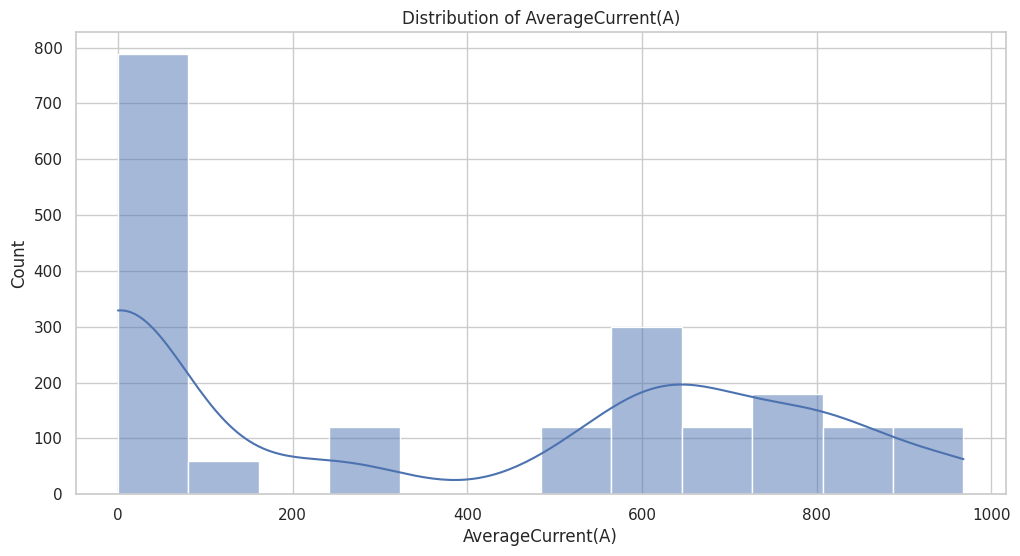

In [47]:
# Individual Feature Analysis

# Histograms for distribution
plt.figure(figsize=(12, 6))
plt.title("Distribution of AverageCurrent(A)")
sns.histplot(genset_data['AverageCurrent(A)'], kde=True)
plt.show()

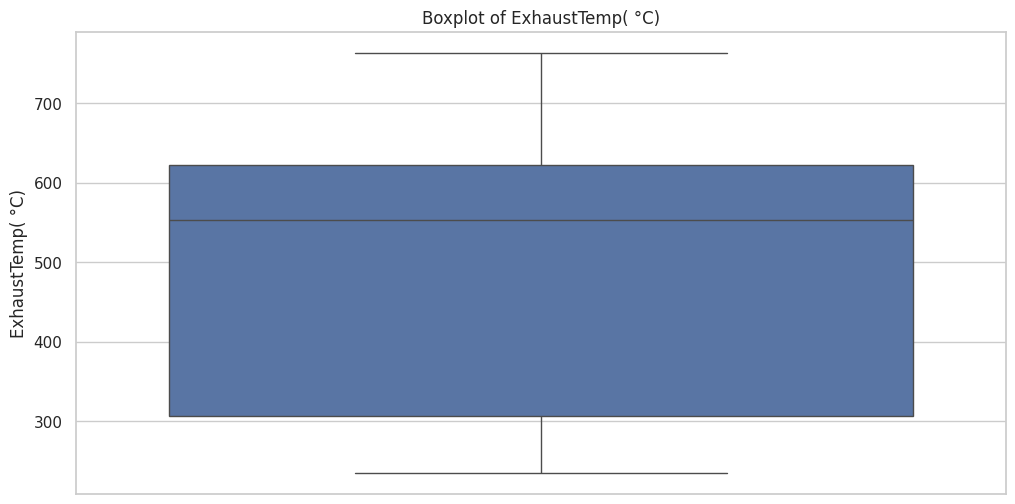

In [48]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
plt.title("Boxplot of ExhaustTemp( °C)")
sns.boxplot(y=genset_data['ExhaustTemp( °C)'])
plt.show()

<ipython-input-49-eb598c027af4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = genset_data.corr()


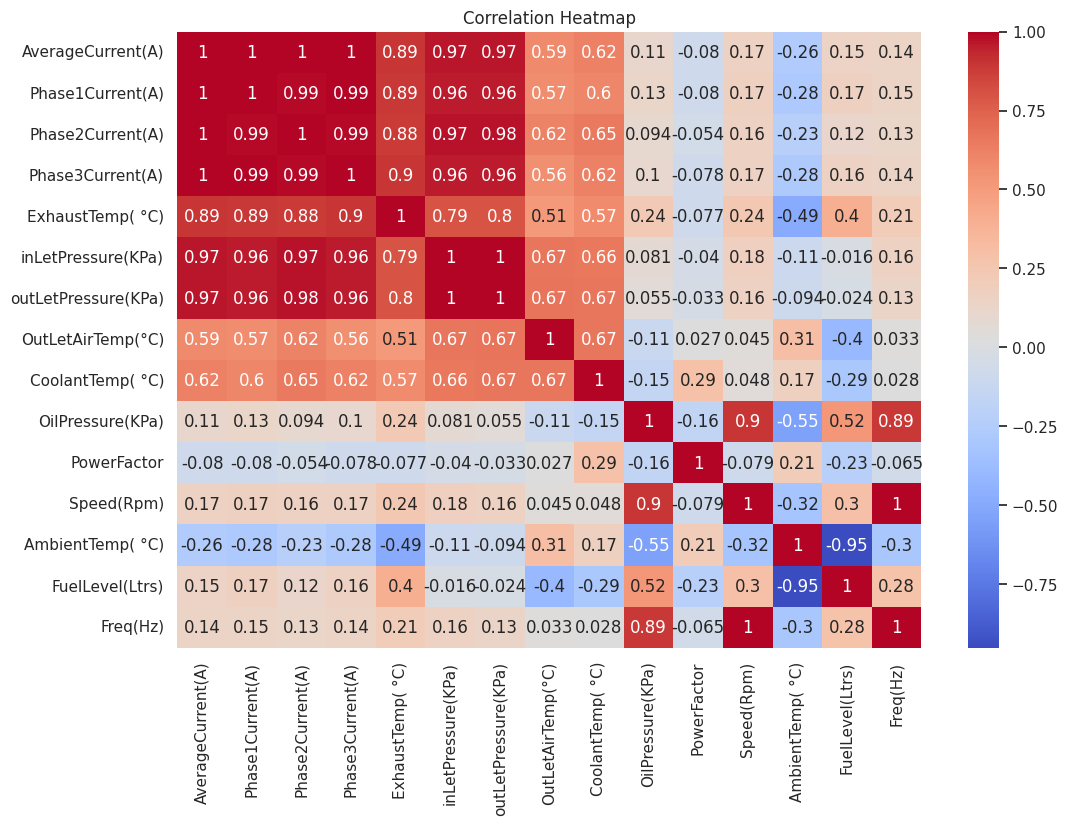

In [49]:
# Correlation Analysis
correlation_matrix = genset_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

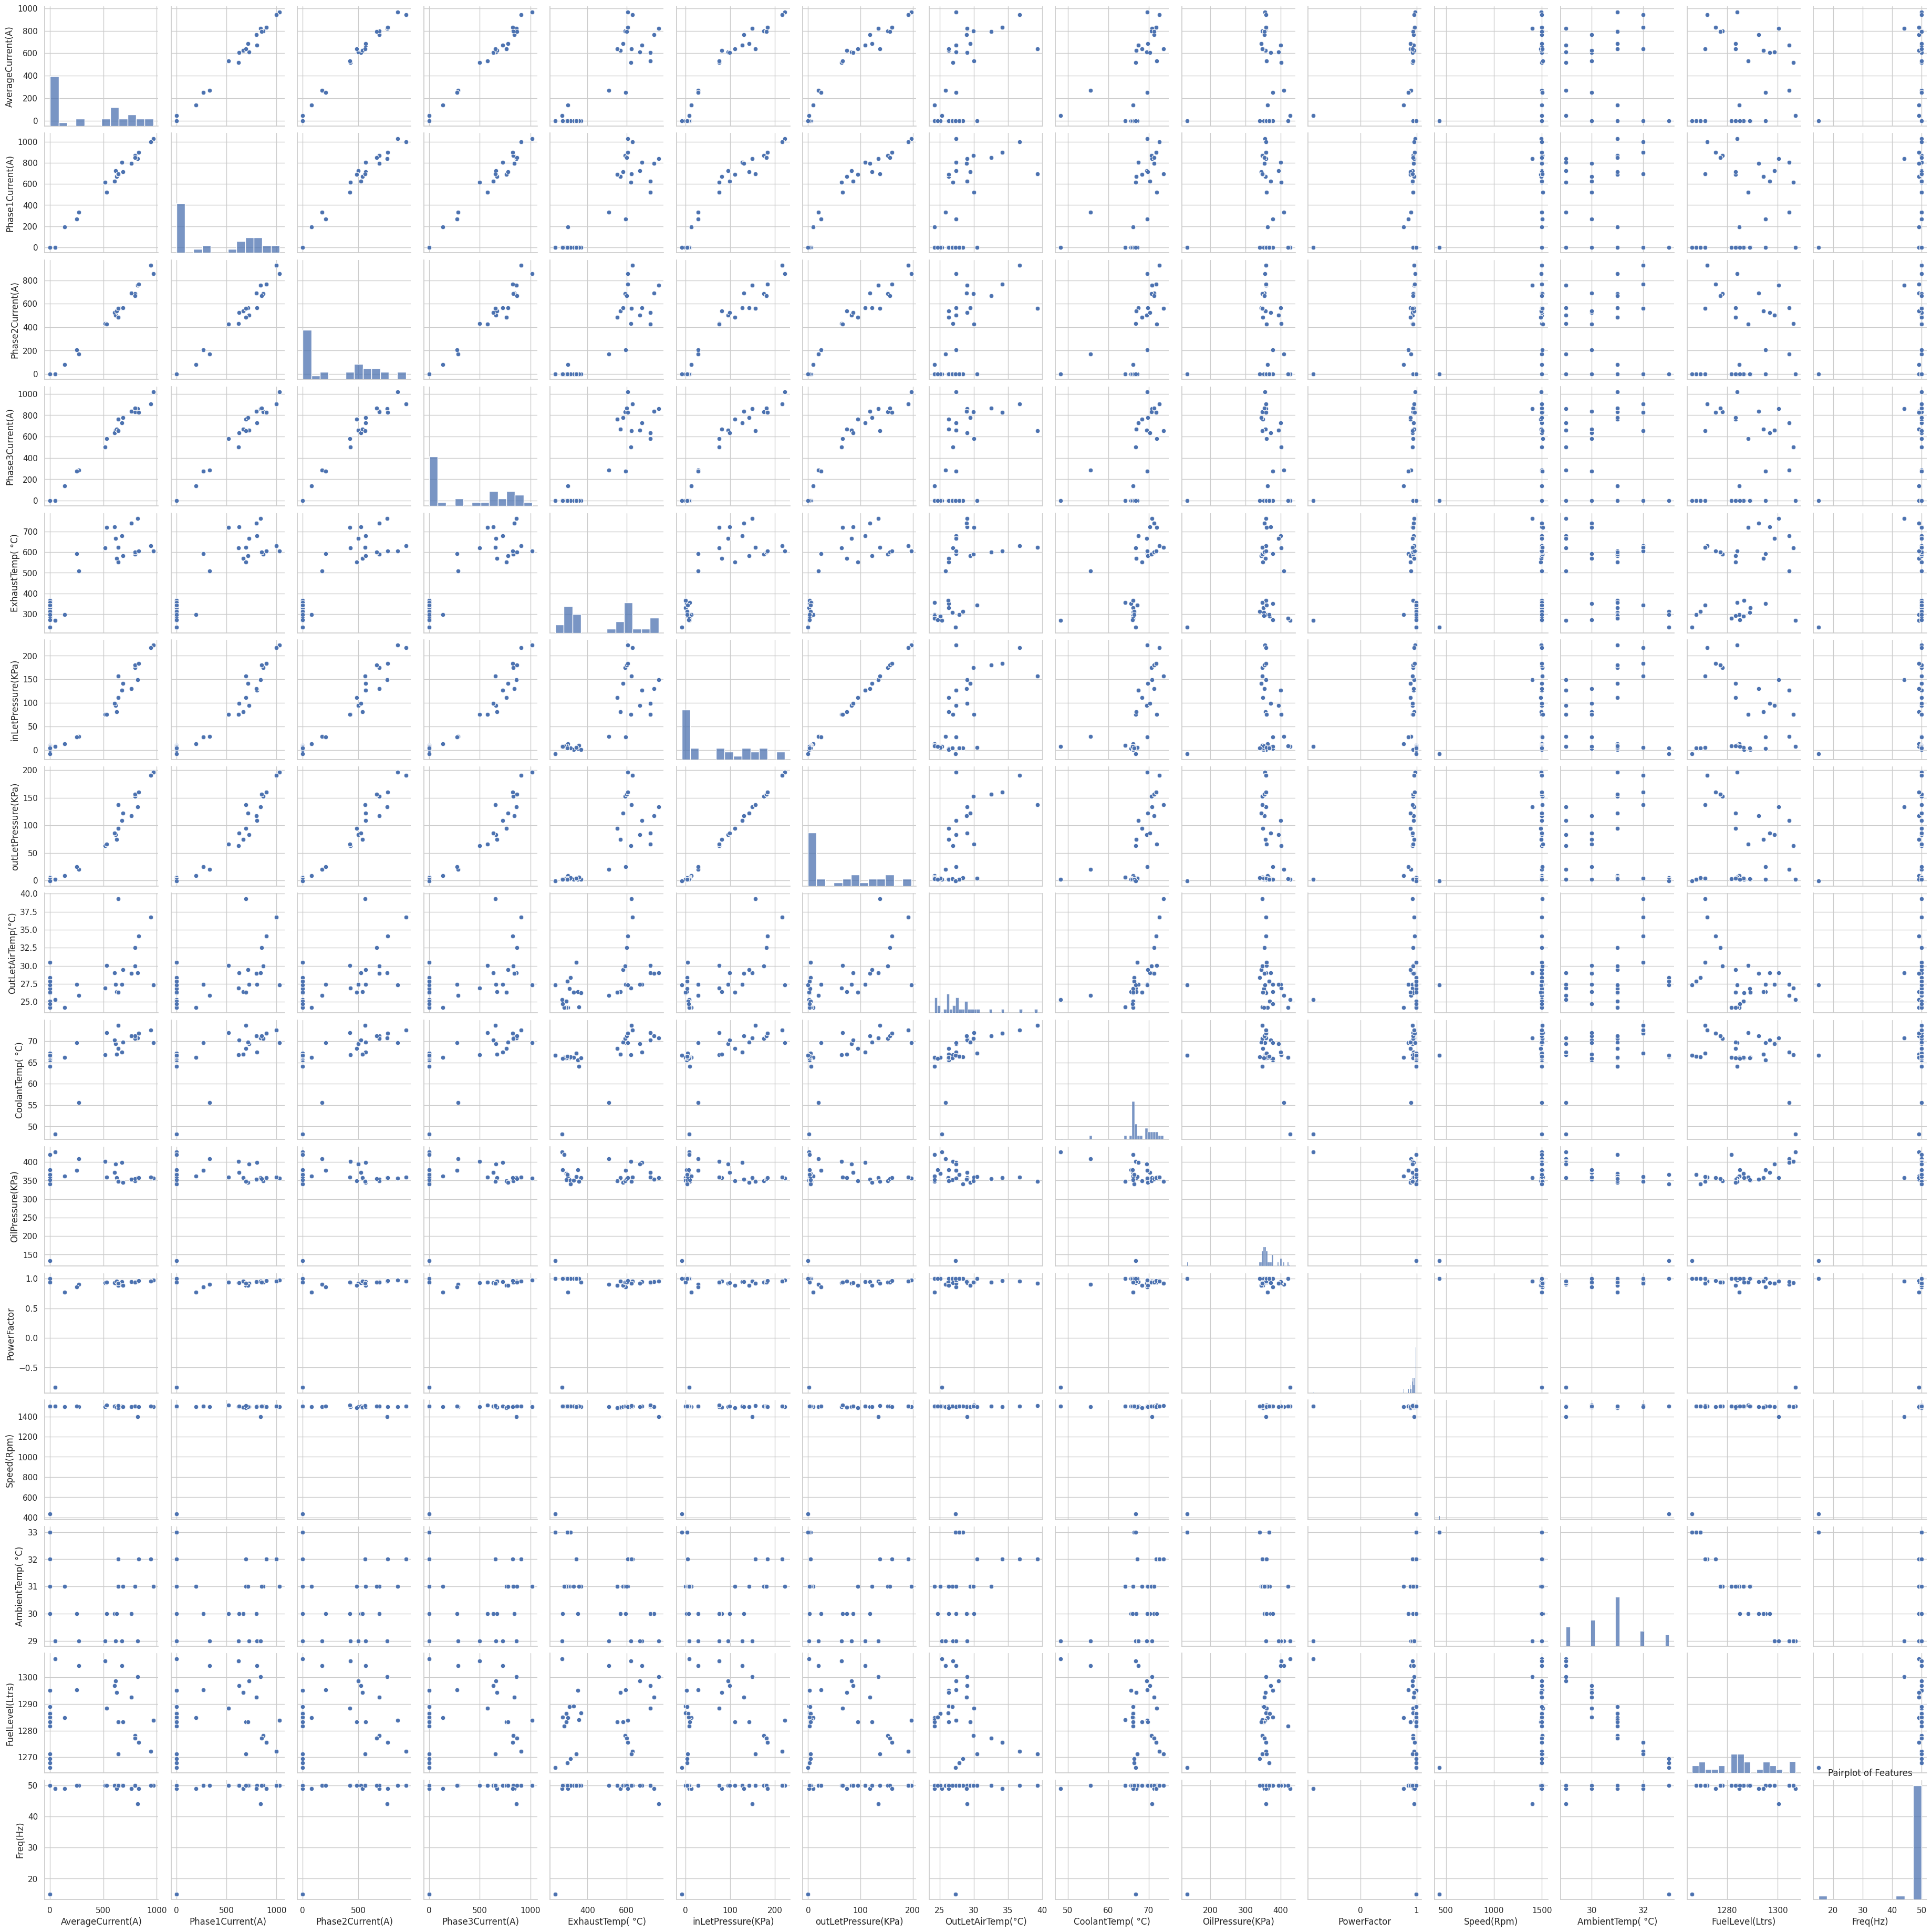

<Figure size 640x480 with 0 Axes>

In [50]:
# Pairplot for Relationships

sns.pairplot(genset_data)
plt.title("Pairplot of Features")
plt.show()
# Save the plot with a high resolution
plt.savefig('pairplot_high_res.svg', dpi=600)

**Distribution of Average Current (A)**

<ul>
<li>The histogram shows that the most common average current values are clustered around the lower end of the scale, with a significant peak at the beginning of the distribution.
<li>There are several other smaller peaks present, suggesting that the genset operates at several distinct load levels.
<li>The long tail to the right indicates that there are periods where the genset operates at higher current levels, which may be less common but could be significant in terms of stress on the genset.
</ul>

Hypothesis: The genset is primarily used at a low to moderate load but occasionally runs at higher loads. The operational patterns could be related to specific time periods or external factors that should be investigated.

**Boxplot of Exhaust Temperature (°C)**

<ul>
<li>The boxplot does not show the typical characteristics, such as median, quartiles, or outliers. This could indicate that the exhaust temperature has a very narrow range of values without much variation, or it could be a result of the visualization scale being skewed by outliers.
<li>Given the lack of visible variation in the boxplot, it may be necessary to inspect the raw data or adjust the scale of the plot to better understand the distribution.
</ul>

Hypothesis: The exhaust temperature is generally consistent, possibly indicating stable genset operation or an issue with the temperature sensor or data recording process.

**Correlation Heatmap**

<ul>
<li>The current-related features (AverageCurrent, Phase1Current, Phase2Current, Phase3Current) are highly correlated with each other, as expected since they should all reflect the load on the genset.
<li>Exhaust temperature shows a moderate to high correlation with current-related features, suggesting that as the load increases, the exhaust temperature does as well.
<li>There's a strong negative correlation between ambient temperature and fuel level, which could suggest higher fuel consumption at higher temperatures or a data recording pattern.
</ul>

Hypothesis: The genset's operating parameters are closely interrelated, with electrical load impacting temperature measurements. There may also be environmental or operational factors influencing fuel consumption.


**Potential Next Steps for Predictive Analysis:**

<ul>
<li>Outlier Analysis: Investigate any outliers in current and temperature readings to understand extreme operating conditions.
<li>Time Series Analysis: Conduct a time series analysis to predict future genset performance based on past trends.
<li>Regression Models: Utilize the correlated variables to build regression models that could predict critical performance metrics like exhaust temperature or fuel level.
<li>Classification Models: Classification models could be trained to predict the likelihood of a failure or the need for maintenance based on the observed parameters.
</ul>

# Feature Engineering

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## 1. Domain-Based Features:

In [52]:
genset_data['Load_Factor'] = genset_data['AverageCurrent(A)'] / genset_data['Phase1Current(A)'].max()

In [53]:
genset_data['Fuel_Efficiency'] = genset_data['FuelLevel(Ltrs)'].diff() / genset_data['AverageCurrent(A)'].diff()

In [54]:
genset_data['Temp_Gradient'] = genset_data['ExhaustTemp( °C)'] - genset_data['CoolantTemp( °C)']

In [55]:
genset_data['Temp_Rise_Rate'] = genset_data['ExhaustTemp( °C)'].diff()

In [56]:
genset_data['Pressure_Ratio'] = genset_data['inLetPressure(KPa)'] / genset_data['outLetPressure(KPa)']

In [57]:
genset_data['Imbalance_Current'] = genset_data[['Phase1Current(A)', 'Phase2Current(A)', 'Phase3Current(A)']].std(axis=1)

In [58]:
genset_data['Power_Factor_Deviation'] = 1 - genset_data['PowerFactor'].abs()

## 2. Transformations: Applying log transformation to skewed data

In [67]:
from scipy.stats import boxcox
# Box-Cox Transformation with error checking
positive_features = genset_data['AverageCurrent(A)'] > 0
try:
    genset_data.loc[positive_features, 'BoxCox_Current'], _ = boxcox(genset_data.loc[positive_features, 'AverageCurrent(A)'])
except ValueError as e:
    print(f"Box-Cox transformation error: {e}")

## 3. Aggregations

In [60]:
genset_data['RollingAvg_Current'] = genset_data['AverageCurrent(A)'].rolling(window=5).mean()

In [61]:
genset_data['EWMA_Current'] = genset_data['AverageCurrent(A)'].ewm(span=50).mean()

In [62]:
genset_data['Max_Current'] = genset_data['AverageCurrent(A)'].rolling(window=5).max()
genset_data['Std_Current'] = genset_data['AverageCurrent(A)'].rolling(window=5).std()

## 4. Feature Scaling:

In [68]:
# Identify numerical features

numerical_features = genset_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude any non-input features such as IDs, timestamps, or target variables
numerical_features = [feature for feature in numerical_features if feature not in ['ID', 'Timestamp', 'Target']]


In [69]:
scaler = StandardScaler()
genset_data[numerical_features] = scaler.fit_transform(genset_data[numerical_features])

# Predictive Model

# Anomaly Detection

In [70]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [73]:
# Select only numerical columns for the Isolation Forest model
numerical_features = genset_data.select_dtypes(include=['int64', 'float64']).columns

In [74]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
genset_imputed = imputer.fit_transform(genset_data[numerical_features])

In [75]:
# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(genset_imputed)

# Predict anomalies
anomalies = iso_forest.predict(genset_imputed)

# Add a column to the original dataset indicating the anomalies
genset_data['Anomaly'] = anomalies

# Inspect the detected anomalies
anomaly_data = genset_data[genset_data['Anomaly'] == -1]


In [76]:
print(f"Number of anomalies detected: {anomaly_data.shape[0]}")
print(anomaly_data)

Number of anomalies detected: 584
                Time  AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
0     3/7/2021 16:05          -0.928502         -1.073628         -1.021984   
1     3/7/2021 16:05          -0.928502         -1.073628         -1.021984   
2     3/7/2021 16:05          -0.928502         -1.073628         -1.021984   
3     3/7/2021 16:05          -0.928502         -1.073628         -1.021984   
4     3/7/2021 16:05          -0.928502         -1.073628         -1.021984   
...              ...                ...               ...               ...   
1924  3/7/2021 16:37          -1.060868         -1.073628         -1.021984   
1925  3/7/2021 16:37          -1.060868         -1.073628         -1.021984   
1926  3/7/2021 16:37          -1.060868         -1.073628         -1.021984   
1927  3/7/2021 16:37          -1.060868         -1.073628         -1.021984   
1928  3/7/2021 16:38          -1.060868         -1.073628         -1.021984   

      Phase3Curre

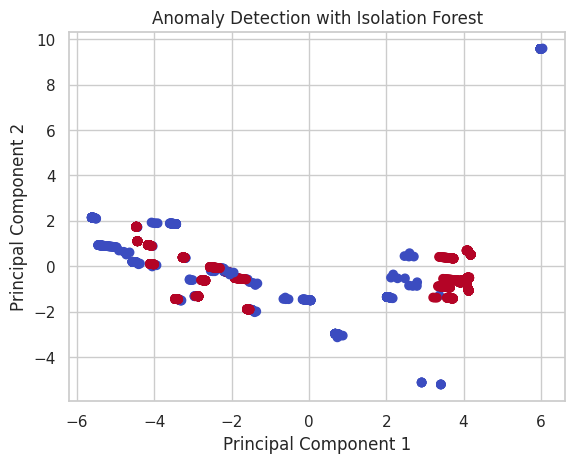

In [79]:
# Optional: Import PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions
pca = PCA(n_components=2)
genset_reduced = pca.fit_transform(genset_imputed)

# Plot
plt.scatter(genset_reduced[:, 0], genset_reduced[:, 1], c=anomalies, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()